0.06783340116673449


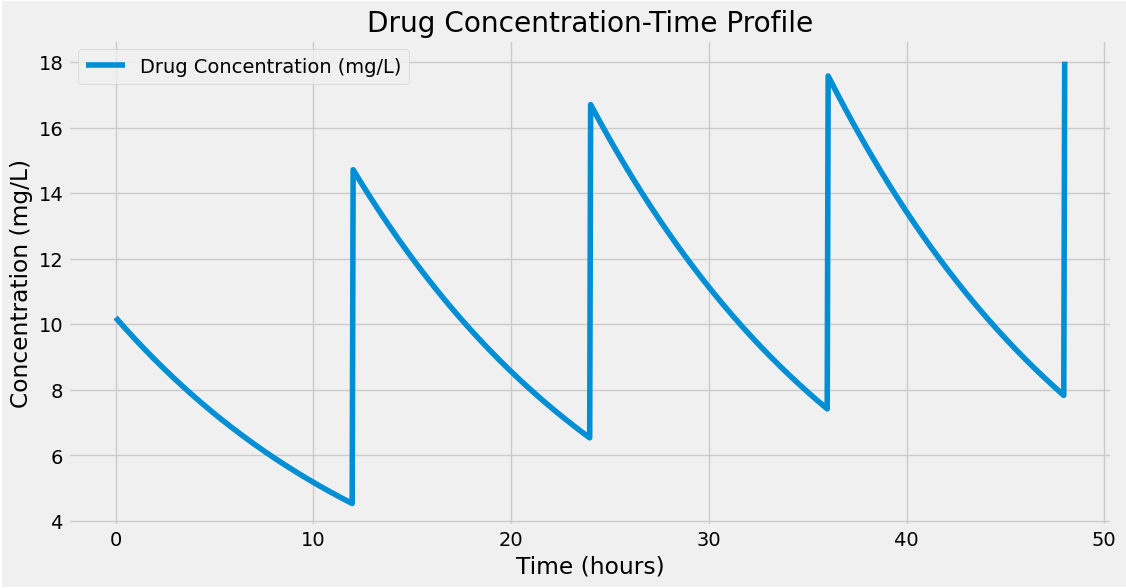

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
D = 500  # Dose in mg
V = 49  # Volume of distribution in L
t_half = 6  # Half-life in hours
tau = 12  # Dosing interval in hours

# Calculated parameters
#Ke = np.log(2) / t_half  # Elimination rate constant
#CL = V * k  # Clearance
#Buelga 2005
def Ke(sCr, Age, weight, V=49):
    eCCr = (140 - Age)*weight/(72*sCr)
    Vanco_CL = (60*eCCr)/(1000*1.08)# l/hr
    Kel = (Vanco_CL/V)#hr-1
    return Kel
    
    
Ke = Ke(1.3, 60, 70)  
print(Ke)
# Time array
t_max = 48  # Total time for simulation in hours
time = np.linspace(0, t_max, 1000)

# Function to calculate concentration at any time t
def concentration(t, D, V, Ke, tau):
    conc = np.zeros_like(t)
    for i, time_point in enumerate(t):
        for n in range(int(time_point // tau) + 1):
            conc[i] += (D / V) * np.exp(-Ke * (time_point - n * tau))
    return conc

# Calculate concentration over time
conc = concentration(time, D, V, Ke, tau)

#Staph aureus
#intrinsic growtrh rate: rho = 0.35 hour^-1
#vancomycin-induced death rate: 
#0.0958 - 0.1458, 0.1 - 0.1208
#0.166, 0.208, 0.625
#vancomycin resistant: 0.0833



# ODE system parameters
#0.6931 assuming SA doubling time of 60 minutes
rho = 0.6931 #both sensitive and resistant SA are growing at the same rate
k = 10e5# or 10e6
#death rate for sensitive >>> death rate for resistant bacteria 
deltaS = 1.10 #death rate sensitive
deltaR = 0.002#death rate resistant
S = 20
R = 10
r = [S, R]
EC_50 = 0.03

# System ODE
def system_ode(t, r):
    S = r[0]
    R = r[1]
    conc_t = np.interp(t, time, conc)
    dSdt = (1 - (conc_t / (conc_t + EC_50)) * rho * S*(1 - (S + R) / k)) - deltaS * S
    dRdt = rho * R * (1 - (S + R) / k) - deltaR * R
    return [dSdt, dRdt]

# System ODE
def system_ode_predrug(t, R):
    dRdt = rho * R * - R * R / k
    return [dRdt]

ode_soln_predrug = solve_ivp(system_ode_predrug, t_span=[0, 72], y0=[2], t_eval=time)

# last point of ode_soln_predrug -> y0[0] for the sensitive bacteria

ode_soln = solve_ivp(system_ode, t_span=[0, 48], y0=[2, 2], t_eval=time)





# Plot the concentration-time profile
#plt.rcParams['lines.linewidth'] = 1
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12, 6), linewidth = 1.0)
ax.plot(time, conc, label='Drug Concentration (mg/L)')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Concentration (mg/L)')
ax.set_title('Drug Concentration-Time Profile')
plt.legend()
plt.grid(True)

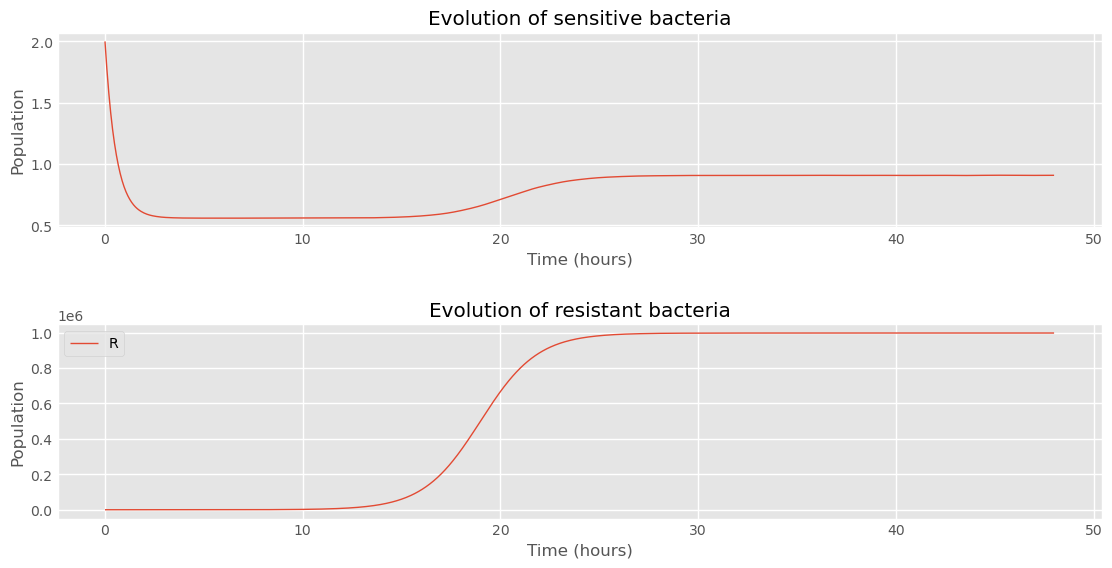

In [12]:
# Plot the ODE solution
plt.rcParams['lines.linewidth'] = 1
plt.style.use('ggplot')
fig, ax = plt.subplots(2, figsize=(12, 6))

ax[0].plot(ode_soln.t, ode_soln.y[0], label='S')
ax[1].plot(ode_soln.t, ode_soln.y[1], label='R')
ax[0].set_xlabel('Time (hours)')
ax[0].set_ylabel('Population')
ax[1].set_xlabel('Time (hours)')
ax[1].set_ylabel('Population')
ax[0].set_title('Evolution of sensitive bacteria')
ax[1].set_title('Evolution of resistant bacteria')
fig.subplots_adjust(hspace= 0.5, wspace=0.2)  # Adjust horizontal space between plots
plt.legend()
plt.grid(True)
plt.savefig('resistant_death_rate0.002.png')

## Calculating model parameters for vancomycin

In [11]:
def Ke(sCr, Age, weight, V=49):
    eCCr = (140 - Age)*weight/(72*sCr)# ml/min
    Vanco_CL = (60*eCCr)/(1000*1.08)# l/hr
    Kel = (Vanco_CL)/(V)# hr-1
    return Kel
    
    
Ke = Ke(1.3, 60, 70)  
print(Ke)

0.06783340116673449


In [12]:
eCCr = (140 - 60)*70/(72*1.2)#mL/min
print(eCCr)

64.81481481481482


## Vancomycin CL from Buelga 2005

In [13]:
Vanco_CL = (60*eCCr)/(1000*1.08)# l/hr
print(Vanco_CL)

3.6008230452674903


In [14]:
t_half = 6  # Half-life in hours
#tau = 12  # Dosing interval in hours

# Calculated parameters
Ke = np.log(2) / t_half  # Elimination rate constant
new_Ke = Ke
print(new_Ke)

0.11552453009332421


In [15]:
Ke = 0.00083*eCCr + 0.0044
Ke

0.05819629629629631